In [369]:
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [370]:
def Potential2D(r, q, k, rprime):
    esp = 0.001
    potential = k*q/np.sqrt((r[0]-rprime[0])**2+(r[1]-rprime[1])**2+(esp**2)) #+(r[2]-rprime[2])**2
    return(potential)

In [371]:
def ChargeLocationPolar(NumberOfCharges,radius,StartingTheta,SpacingTheta,orginx,orginy):
    rprime = np.empty([NumberOfCharges,2],dtype = float)
    for i in range(NumberOfCharges):
        rprime[i][0] = radius*np.cos(float(StartingTheta+SpacingTheta*i))+orginx
        rprime[i][1] = radius*np.sin(float(StartingTheta+SpacingTheta*i))+orginy
    return(rprime)

Part a

In [372]:
NumberOfCharges = 3
q = 1
k = 1
radius = 5*np.sqrt(2)
StartingTheta = (1/2)*np.pi
SpacingTheta = (2/3)*np.pi
rprime = ChargeLocationPolar(NumberOfCharges,radius,StartingTheta,SpacingTheta,0.0, 0.0)

In [373]:
x = np.arange(-50, 50, 0.1)
y = np.arange(-50, 50, 0.1)
r = np.meshgrid(x, y)

In [374]:
TotalPotential = np.empty([len(x),len(y)])
TotalPotential.fill(0.0)
for i in range(NumberOfCharges):
    TotalPotential += Potential2D(r, q, k, rprime[i])

C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


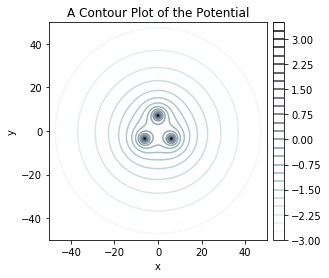

In [375]:
levels = np.arange(-50,50,0.25)
image = plt.contour(x,y,np.log(TotalPotential), cmap = "bone_r", levels=levels)
plt.colorbar(image,orientation="vertical",pad=0.02)
plt.axes().set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.title("A Contour Plot of the Potential")
plt.show()

In order to find the Electric Field, we need to take the negative gradient of the potential that we have found.

The gradient is $\frac{\partial \phi}{\partial x}\hat i +\frac{\partial \phi}{\partial y}\hat j+ \frac{\partial \phi}{\partial z}\hat k$

So we would have to take a derivative in each spacial direction.

I belive that the central difference would be the best option, because we can treat the Potenial values that we haves as "Sample Data". Our text book uses the central difference method for sample data, because there are no data points a that exist at the half interval points that are required for the forward and backward methods.

For the central difference, you take the data point before the location you want ot fine tha tderivative at and the data point after it. Then you use the following equaiton:

$\frac{(Data Point After)-(Data Point Before)}{2*(Sample Spacing)}$

The above will give you the derivative at the point you want to find it.

Lucky for us, the makeers of numpy have made a gradient function that take our potential and calcuates the gradient for us. Now, we can feed it meshgrids and not have to worry about the indexing of the meshs.

In [376]:
ElectriacField = np.gradient(TotalPotential)

In [377]:
MagElectriacField = np.sqrt(ElectriacField[0]**2+ElectriacField[1]**2)

C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


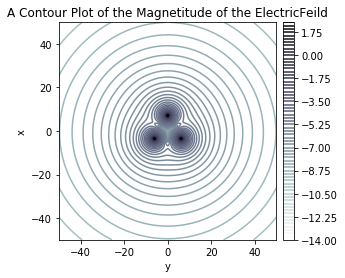

In [378]:
levels = np.arange(-50,50,0.25)
image = plt.contour(x,y,np.log(MagElectriacField), cmap = "bone_r", levels=levels)
plt.colorbar(image,orientation="vertical",pad=0.02)
plt.axes().set_aspect('equal')
plt.xlabel("y")
plt.ylabel("x")
plt.title("A Contour Plot of the Magnetitude of the ElectricFeild")
plt.show()

Below is my attempt at a vector feild.

It did not work.

In [379]:
x = np.arange(-8, 8, 0.01)
y = np.arange(-8, 8, 0.01)
U, V = np.meshgrid(x, y)
r = np.meshgrid(x, y)

In [381]:
TotalPotential = np.empty([len(x),len(y)])
TotalPotential.fill(0.0)
for i in range(NumberOfCharges):
    TotalPotential += Potential2D(r, q, k, rprime[i])

In [382]:
ElectriacField = np.gradient(TotalPotential)

In [383]:
maxx = np.max(ElectriacField[0])
maxy = np.max(ElectriacField[1])

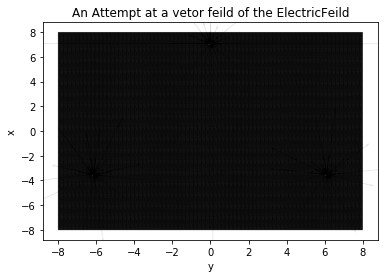

In [384]:
plt.quiver(U, V, ElectriacField[0]/maxx,ElectriacField[1]/maxy, scale=1, alpha=0.1)
# plt.axes().set_aspect('equal')
plt.xlabel("y")
plt.ylabel("x")
plt.title("An Attempt at a vetor feild of the ElectricFeild")
plt.show()

Part B

In [385]:
radius1 = 2.0
radius2 = 15.0
originx = 0.0
originy = 0.0
k = 1

NumberOfCharges1 = 12*10
q1 = 2
StartingTheta1 = 0.0
SpacingTheta1 = 2*np.pi/NumberOfCharges1

ring1prime = ChargeLocationPolar(NumberOfCharges1,radius1,StartingTheta1,SpacingTheta1,originx,originy)

In [386]:
q2 = q1*radius2/radius1
StartingTheta2 = 0.0*np.pi*(1/2)
SpacingTheta2 = SpacingTheta1
NumberOfCharges2 = int(radius2*NumberOfCharges1/radius1)

ring2prime = ChargeLocationPolar(NumberOfCharges2,radius2,StartingTheta2,SpacingTheta2,originx,originy)

In [387]:
x = np.arange(-50.0, 50.0, 0.1)
y = np.arange(-50.0,50.0, 0.1)
r = np.meshgrid(x, y)

In [388]:
TotalPotential = np.empty([len(x),len(y)])
TotalPotential.fill(0.0)
for i in range(NumberOfCharges1):
    TotalPotential += Potential2D(r, q1, k, ring1prime[i])
for i in range(NumberOfCharges2):
    TotalPotential += Potential2D(r, q2, k, ring2prime[i])

C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


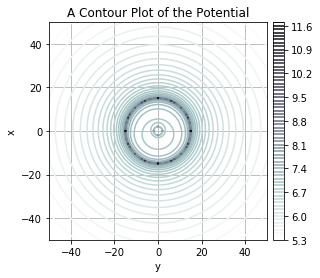

In [389]:
levels = np.arange(-50.0,50.0,0.1)
image = plt.contour(x,y,np.log(TotalPotential), cmap = "bone_r", levels=levels)
plt.colorbar(image,orientation="vertical",pad=0.02)
plt.grid()
plt.axes().set_aspect('equal')
plt.xlabel("y")
plt.ylabel("x")
plt.title("A Contour Plot of the Potential")
plt.show()

In [390]:
ElectriacField = np.gradient(TotalPotential)

In [391]:
MagElectriacField = np.sqrt(ElectriacField[0]**2+ElectriacField[1]**2)

C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


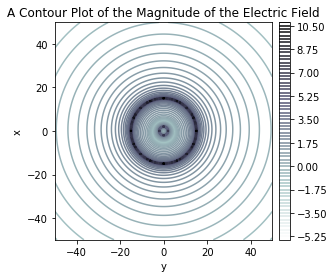

In [392]:
levels = np.arange(-50,50,0.25)
image = plt.contour(x,y,np.log(MagElectriacField), cmap = "bone_r", levels=levels)
plt.colorbar(image,orientation="vertical",pad=0.02)
plt.axes().set_aspect('equal')
plt.xlabel("y")
plt.ylabel("x")
plt.title("A Contour Plot of the Magnitude of the Electric Field")
plt.show()

Part C

In [393]:
def Potential3D(r, q, k, rprime):
    esp = 0.001
    potential = k*q/np.sqrt((r[0]-rprime[0])**2+(r[1]-rprime[1])**2+(r[2]-rprime[2])**2+(esp**2))
    return(potential)

In [394]:
def ChargeLocationRing(NumberOfCharges,radius,StartingTheta,SpacingTheta,orginx,orginy):
    rprime = np.empty([NumberOfCharges,3],dtype = float)
    rprime.fill(0.0)
    for i in range(NumberOfCharges):
        rprime[i][0] = radius*np.cos(float(StartingTheta+SpacingTheta*i))+orginx
        rprime[i][2] = radius*np.sin(float(StartingTheta+SpacingTheta*i))+orginy
    return(rprime)

In [395]:
def ChargeLocationRectangle(sidea,sideb, a, b):
    rprime = np.empty([sidea*sideb,3],dtype = float)
    rprime.fill(0.0)
    for i in range(int(sidea)):
        for j in range(int(sideb)):
            rprime[int(i*sideb+j)][0] = i*b/sidea+(b/2)*(-1+1/sidea)
            rprime[int(i*sideb+j)][1] = j*b/sidea-128*b/(2*sidea)
    return(rprime)

In [396]:
k = 1

In [397]:
a = 20
b = 20
sidea = 2**3
sideb = 2**7
NumberOfCharges1 = sidea*sideb
planerprime = ChargeLocationRectangle(sidea,sideb, a, b)

In [398]:
radius = 20.0
originx = 0.0
originy = 0.0

NumberOfCharges2 = 1080
q = 2
StartingTheta = 0.0
SpacingTheta = 2*np.pi/NumberOfCharges2

ringrprime = ChargeLocationRing(NumberOfCharges2,radius,StartingTheta,SpacingTheta,originx,originy)

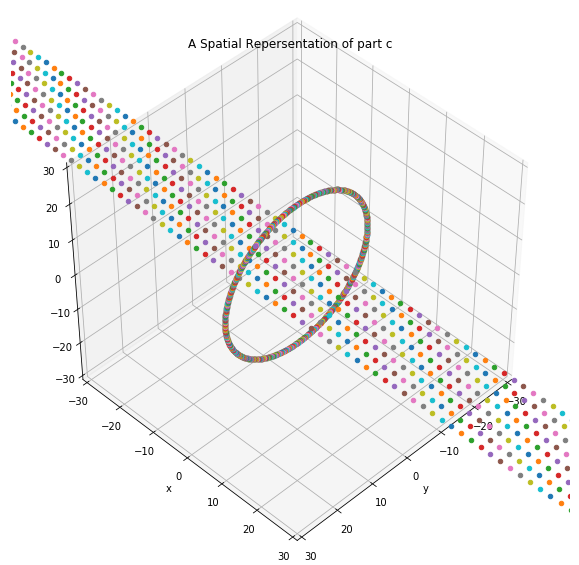

In [400]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-30,30)
ax.set_ylim3d(-30,30)
ax.set_zlim3d(-30,30)
ax.view_init(45, 45)
for i in range(len(ringrprime)):
    ax.scatter(ringrprime[i][0],ringrprime[i][1],ringrprime[i][2])
for i in range(len(planerprime)):
    ax.scatter(planerprime[i][0],planerprime[i][1],planerprime[i][2])
plt.xlabel("y")
plt.ylabel("x")
plt.title("A Spatial Repersentation of part c")
plt.show()

In [401]:
x = np.arange(-50.0, 50.0, 1.25)
y = np.arange(-50.0, 50.0, 1.25)
z = np.arange(-50.0, 50.0, 1.25)
r = np.meshgrid(x, y, z)

In [402]:
TotalPotentialPlane = np.empty([len(x),len(y), len(z)])
TotalPotentialPlane.fill(0.0)
for i in range(NumberOfCharges1):
    TotalPotentialPlane += Potential3D(r, q, k, planerprime[i])

In [403]:
TotalPotentialRing = np.empty([len(x),len(y),len(z)])
TotalPotentialRing.fill(0.0)
for i in range(NumberOfCharges2):
    TotalPotentialRing += Potential3D(r, q, k, ringrprime[i])

In [404]:
TotalPotential = TotalPotentialPlane + TotalPotentialRing

In [409]:
for i in range(len(TotalPotential[0][0])):
    levels = np.arange(-30,30,0.01)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.contour(r[0][0],r[2][2],np.log(TotalPotential[:][:][i]), cmap = "bone_r", levels=levels)
    ax.view_init(45,45)
    plt.xlabel("y")
    plt.ylabel("x")
    plt.title("Contour Plot of slices of the potential in part c")
    plt.close()
    fig.savefig("Contour_Plot_of_slices_of_the_potential_in_part_c_"+"{}".format(i)+".png", dpi=fig.dpi, bbox_inches='tight', pad_inches=0.0)
#     plt.show()


In [410]:
ElectriacField = np.gradient(TotalPotential)

In [411]:
MagElectriacField = np.sqrt(ElectriacField[0]**2+ElectriacField[1]**2+ElectriacField[2]**2)

In [412]:
for i in range(len(TotalPotential[0][0])):
    levels = np.arange(-50,50,0.01)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.contour(r[0][0],r[2][2],np.log(MagElectriacField[:][:][i]), cmap = "bone_r", levels=levels)
    ax.view_init(45,45)
    plt.xlabel("y")
    plt.ylabel("x")
    plt.title("Contour Plot of slices of the Magnitude of the Electric Feild in part c")
    plt.close()
    fig.savefig("Contour_Plot_of_slices_of_the_Magnitude of the Electric Feild_in_part_c_"+"{}".format(i)+".png", dpi=fig.dpi, bbox_inches='tight', pad_inches=0.0)
#     plt.show()